In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
%matplotlib inline

In [3]:
digits = load_digits()

In [4]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [5]:
digits_features = pd.DataFrame(digits['data'])
digits_labels = pd.Series(digits['target'])

In [6]:
digits_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

In [7]:
digits_labels

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10      0
11      1
12      2
13      3
14      4
15      5
16      6
17      7
18      8
19      9
20      0
21      1
22      2
23      3
24      4
25      5
26      6
27      7
28      8
29      9
       ..
1767    4
1768    0
1769    5
1770    3
1771    6
1772    9
1773    6
1774    1
1775    7
1776    5
1777    4
1778    4
1779    7
1780    2
1781    8
1782    2
1783    2
1784    5
1785    7
1786    9
1787    5
1788    4
1789    8
1790    8
1791    4
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int64

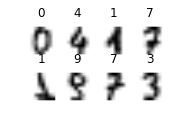

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(2.5,1.5))
rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
for ax, row in zip(axs.reshape(-1), rows):
    np_image = digits_features.iloc[row].values
    np_image = np_image.reshape(8, 8)
    ax.imshow(np_image, cmap='gray_r')
    ax.axis('equal')
    ax.axis('off')
    ax.set_title(digits_labels.iloc[row])

# Split in Train and Test Group

In [9]:
train_features = digits_features.sample(frac=0.8, random_state=1)
train_labels = digits_labels[train_features.index]

test_features = digits_features[~digits_features.index.isin(train_features.index)]
test_labels = digits_labels[test_features.index]

print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

(1438, 64) (1438,)
(359, 64) (359,)


# K-Nearest Neighbor Algorithm

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

In [18]:
def train(X, y, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    return model

def test(model, X, y):
    predictions = model.predict(X)
    mse = np.mean(((predictions - y) ** 2))
    var = np.var(predictions)
    return mse, var

def cross_validation(X_train, y_train, X_test, y_test, k=5):
    kn_model = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(4, shuffle=True, random_state=1)
    mses = cross_val_score(kn_model, X_train, y_train, 
                           scoring='accuracy', cv=kf)
    average_mse = np.round(np.mean(np.abs(mses)), 3)
    return average_mse

def cross_validation_2(X_train, y_train, X_test, y_test, k=5):
    kn_model = train(X_train, y_train, k)
    mse_train, var_train = test(kn_model, X_train, y_train)
    mse_test, var_test = test(kn_model, X_test, y_test)
    return mse_train, var_train, mse_test, var_test

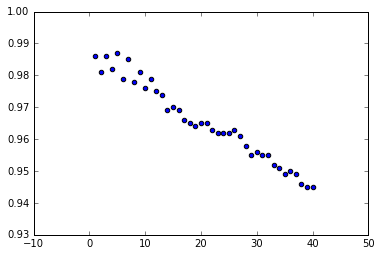

In [19]:
average_mses = []
for n in range(1, 41):
    mse = cross_validation(train_features, train_labels, 
                           test_features, test_labels, k=n)
    average_mses.append(mse)

plt.scatter(range(1, 41), average_mses)

As the number of neighbours increase, the accuracy score also increases.

mses_train = []
vars_train = []
mses_test = []
vars_test = []
for n in range(1, 3):   
    mse_train, var_train, mse_test, var_test = cross_validation_2(
                                                train_features, train_labels, 
                                                test_features, test_labels, 
                                                k=n)
    mses_train.append(mse_train)
    vars_train.append(vars_train)
    mses_test.append(mse_test)
    vars_test.append(var_test)
    
fig, ax = plt.subplots()
ax.plot(range(1, 3), mses_train)
ax.plot(range(1, 3), vars_train)
ax.plot(range(1, 3), mses_test)
ax.plot(range(1, 3), vars_test)

In [13]:
mse_train, var_train, mse_test, var_test = cross_validation_2(
                                                train_features, train_labels, 
                                                test_features, test_labels, 
                                                k=1)
print(mse_train, var_train, mse_test, var_test)

0.0 8.108968084633077 0.5459610027855153 8.542019382220808


# Neural Networks

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

In [34]:
def train_test_nn(X_train, y_train, X_test, y_test, neurons=1):
    nn = MLPClassifier(hidden_layer_sizes=(neurons))
    nn.fit(X_train, y_train)
    pred_train = nn.predict(X_train)
    pred_test = nn.predict(X_test)
    roc_train = mean_squared_error(y_train, pred_train)
    roc_test = mean_squared_error(y_test, pred_test)
    return roc_train, roc_test

rocs_train = []
rocs_test = []
neurons = [8, 16, 32, 64, 128, 256]
for n in neurons:
    roc_train, roc_test = train_test_nn(train_features, 
                                        train_labels, 
                                        test_features, 
                                        test_labels, n)
    rocs_train.append(roc_train)
    rocs_test.append(roc_test)



/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



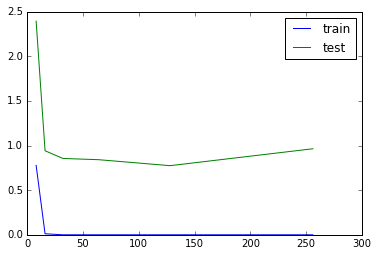

In [39]:
plt.plot(neurons, rocs_train, label='train')
plt.plot(neurons, rocs_test, label='test')
plt.legend()
plt.show()

Lowest test error is obtained at 128 neurons. At more than that, the test error seems increases.

In [57]:
def cross_validation_nn(X_train, y_train, X_test, y_test, n=5):
    nn = MLPClassifier(hidden_layer_sizes=(n, n, n))
    kf = KFold(6, shuffle=True, random_state=1)
    mses_train = []
    mses_test = []
    
    for train_index, test_index in kf.split(X_train):
        X = X_train.iloc[train_index]
        y = y_train.iloc[train_index]
        Xt = X_train.iloc[test_index]
        yt = X_train.iloc[test_index]
        
        nn.fit(X, y)
        predict_train = nn.predict(Xt)
        mse_train = mean_squared_error(yt, predict_train)
        mses_train.append(mse_train)
        
        predict_test = nn.predict(X_test)
        mse_test = mean_squared_error(y_test, predict_test)
        mses_test.append(mse_test)
        
    avg_mse_train = np.mean(mses_train)
    avg_mse_test = np.mean(mses_test)
    return avg_mse_train, avg_mse_test

neurons = [10, 64, 128]
mses_train = []
mses_test = []
for n in neurons:
    mse_train, mse_test = cross_validation_nn(train_features, 
                                                train_labels, 
                                                test_features, 
                                                test_labels, n)
    mses_train.append(mse_train)
    mses_test.append(mse_test)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



ValueError: y_true and y_pred have different number of output (64!=1)

In [58]:
def train_test_nn(X_train, y_train, X_test, y_test, neurons=1):
    nn = MLPClassifier(hidden_layer_sizes=(neurons, neurons, neurons))
    nn.fit(X_train, y_train)
    pred_train = nn.predict(X_train)
    pred_test = nn.predict(X_test)
    roc_train = mean_squared_error(y_train, pred_train)
    roc_test = mean_squared_error(y_test, pred_test)
    return roc_train, roc_test

rocs_train = []
rocs_test = []
neurons = [10, 64, 128]
for n in neurons:
    roc_train, roc_test = train_test_nn(train_features, 
                                        train_labels, 
                                        test_features, 
                                        test_labels, n)
    rocs_train.append(roc_train)
    rocs_test.append(roc_test)



/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



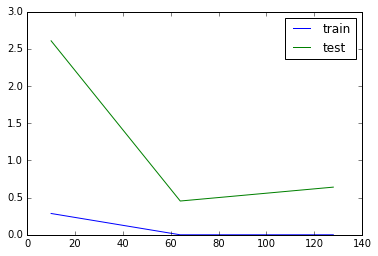

In [59]:
plt.plot(neurons, rocs_train, label='train')
plt.plot(neurons, rocs_test, label='test')
plt.legend()
plt.show()

With three layers and 64 neurons, we get lower error that single layer.

In [61]:
nn = MLPClassifier(hidden_layer_sizes=(64, 64, 64))
nn.fit(train_features, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

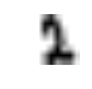

Predicted value is [2]
Actual value is 2


In [108]:
row = np.random.choice(test_features.index)
np_image = digits_features.iloc[row].values
np_image = np_image.reshape(8, 8)
fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(np_image, cmap='gray_r')
ax.axis('equal')
ax.axis('off')
plt.show()

prediction = nn.predict(test_features.loc[row].values.reshape(1,-1))
print('Predicted value is {}'.format(prediction))
print('Actual value is {}'.format(digits_labels.iloc[row]))

# Slide 1
In the last mission, we learned how adding hidden layers of neurons to a neural network can improve its ability to capture nonlinearity in the data. We tested different neural networks models on a dataset that we generated with deliberate nonlinearity.

In this Guided Project, we'll:

explore why image classification is a hard task
observe the limitations of traditional machine learning models for image classification
train, test, and improve a few different deep neural networks for image classification
As we mentioned in the first mission in this course, deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks here.

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper.

Why is image classifcation a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

Here's an example of how an image is represented across the different abstractions we care about:

Single Image

Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.

NN Learns Hierarchy

You'll notice in the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this Guided Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

# Slide 2
Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function:

first_image = train.iloc[0]
first_image = first_image.drop('label', axis=1)
np_image = first_image.values
np_image = np_image.reshape(28,28)
Now that the data is in the right shape, we can visualize it using pyplot.imshow() function:

plt.imshow(np_image, cmap='gray_r')
To display multiple images in one matplotlib figure, we can use the equivalent axes.imshow() function. Let's use what we've learned to display images from both classes.

Instructions

Import load_digits() from the sklearn.datasets package.
Transform the NumPy 2D array into a pandas dataframe.
Use matplotlib to visualize some of the images in the dataset.
Generate a scatter plot grid, with 2 rows and 4 columns.
In the first row:
Display the images corresponding to rows 0, 100, 200, and 300.
In the second row:
Display the images corresponding to rows 1000, 1100, 1200, and 1300.

# Slide 3
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

Recall that you can use the KNeighborsClassifier package to train and test k-nearest neighbors models.

Instructions

Split up the data into train and test sets.
Setup a pipeline for testing and training k-nn models.
Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
Write a function named test() that tests the model.
Write a function named cross_validate() that performs 4-fold cross validation using train() and test().
Experiment with different values for k and plot the resulting classification accuracies.

# Slide 4
There are a few downsides to using k-nearest neighbors:

high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
no model representation to debug and explore
Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

Instructions

Using 4-fold cross validation:

Train and test a neural network model using a single hidden layer of 8 neurons.
Train and test a neural network model using a single hidden layer of 16 neurons.
Train and test a neural network model using a single hidden layer of 32 neurons.
Train and test a neural network model using a single hidden layer of 64 neurons.
Train and test a neural network model using a single hidden layer of 128 neurons.
Train and test a neural network model using a single hidden layer of 256 neurons.
Create a new Markdown cell summarizing what you saw.

Rank the performance of the models by the overall accuracies.
Which models, if any, start to overfit?
For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

# Slide 5
Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

Instructions

Modify the neural network training pipeline to use 2 hidden layers instead in the network.
Using 4-fold cross validation:
Train a neural network model using 2 hidden layers:
64 neurons in the first hidden layer.
64 neurons in the second hidden layer.
Create a new Markdown cell summarizing what you saw.

Rank the performance of the models by the overall accuracies.
Which models, if any, start to overfit?
For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

# Slide 6
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

Instructions

Modify the neural network training pipeline to use 6 fold cross validation instead.
Train a neural network model using 3 hidden layers:
10 neurons in the first hidden layer.
10 neurons in the second hidden layer.
10 neurons in the third hidden layer.
Train a neural network model using 3 hidden layers:
64 neurons in the first hidden layer.
64 neurons in the second hidden layer.
64 neurons in the third hidden layer.
Train a neural network model using 3 hidden layers:
128 neurons in the first hidden layer.
128 neurons in the second hidden layer.
128 neurons in the third hidden layer.
Create a new Markdown cell summarizing what you saw.

Rank the performance of the models by the overall accuracies.
Which models, if any, start to overfit?
For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

# Slide 7
In this guided project, you experimented with different models to classify handwritten digits. That's it for the guided steps.

Here are some next steps to try:

* Use the existing pipeline you've built to try other machine learning models:
    * Decision Tree Models
    * Random Forest Models
* Write up a summary of the effectiveness of the different models you tried, with data to back up your conclusions.
* Experiment with different activation functions to see if the accuracies improve.
* Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.
* Visualization of MLP Weights on MNIST (https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)
* Curious to see what other students have done on this project? (https://community.dataquest.io/tags/c/social/share/49/244) Head over to our Community to check them out. While you are there, please remember to show some love and give your own feedback!

* And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!

In future courses, we'd like to dive deeper into:

* Image classification and computer vision
* Higher performance tools for neural networks (like Tensorflow or PyTorch)
* Different neural network architectures (like Convolutional Neural Networks)